## Feature Varying Graph

Plots important values as a function of feature number.

#### Import packages and read in pre-processed dataframes/arrays

In [2]:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featureDf = pd.read_pickle('./processed.files/labelled/featureDf')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDf')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/features.npy')
preProcLabels = np.load('./processed.files/labelled/labels.npy')

print np.argwhere(np.isnan(preProcFeats))
print np.argwhere(np.isfinite(preProcFeats) != True)

[]
[]


399


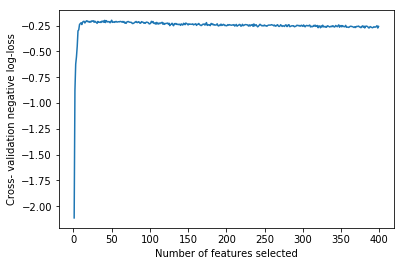

In [47]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross- validation negative log-loss")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.savefig('feature.importance.graphs/cvold.png')
plt.show()

In [48]:
featidx = rfe.get_support(indices=True)
print featidx
featureStrs = featureDf.columns.values
print featureStrs[featidx]

[  0   1   2   4   5   6   7   8  10  11  12  15  18  20  21  22  24  31
  32  35  41  42  58 205 206 217 222 262 290 294 298 306 310 318 322 326
 330 331 333 334 337 338 339 341 350 369 377 385 391 396]
['MJDstart' 'bestDM' 'bestSNR' 'Events' 'DMmax' 'DMmin' 'DMmean' 'DMmedian'
 'SNRmean' 'SNRmedian' 'SNRstd' 'pctZeroDeriv' 'longestRun0' 'longestRun2'
 'globtsStatsStd' 'globtsStatsMax' 'globtsStatsMin' 'globtsStatsMean'
 'globDedisptsStatsStd' 'globDedisptsStatsMin' 'globDedisptsStatsRatio1'
 'globDedisptsStatsMean' 'windTimeStatsStd15' 'pixelsMax02' 'pixelsMax03'
 'pixelsMax32' 'pixelsMax43' 'pixelsMax143' 'pixelsMin53' 'pixelsMin63'
 'pixelsMin73' 'pixelsMin93' 'pixelsMin103' 'pixelsMin123' 'pixelsMin133'
 'pixelsMin143' 'pixelsMin153' 'pixelsMean00' 'pixelsMean02' 'pixelsMean03'
 'pixelsMean12' 'pixelsMean13' 'pixelsMean20' 'pixelsMean22' 'pixelsMean43'
 'pixelsMean92' 'pixelsMean112' 'pixelsMean132' 'pixelsMean150' 'relMJDmax']


In [15]:
featidx = [0,1,2,4,5,6,7,8,10,11,12,15,18,20,21,22,24,31,32,35,41,42,58,205,206,217,222,262,290,294,298,306,31,318,322,326,330,331,333,334,337,338,339,341,350,369,377,385,391,396]

print preProcFeats.shape
redfeat = preProcFeats[:, featidx]
print redfeat.shape

k_fold = sklearn.model_selection.StratifiedKFold(n_splits=6, shuffle=True)

estimator = sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False)

clf = sklearn.multiclass.OneVsRestClassifier(estimator,
            n_jobs=1)

print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat, preProcLabels,\
                                            cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

(13419, 399)
(13419, 50)
-0.225961629219
